In [1]:
data_full="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/09_06_2022_motif_scanning/mooods_run/"
data_250M="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878_250M/GM12878_250M_07.19.2022_bias_transfer_1234_fold_0_data_type_ATAC_PE/09_06_2022_motif_scanning/moods_run/"
data_100M="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878_100M/GM12878_100M_07.19.2022_bias_transfer_1234_fold_0_data_type_ATAC_PE/09_06_2022_motif_scanning/moods_run/"
data_50M="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878_50M/GM12878_50M_07.18.2022_bias_transfer_1234_fold_0_data_type_ATAC_PE/09_06_2022_motif_scanning/moods_run/"
data_25M="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878_25M/GM12878_25M_07.18.2022_bias_transfer_1234_fold_0_data_type_ATAC_PE/09_06_2022_motif_scanning/moods_run/"
data_5M="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878_5M/GM12878_5M_07.18.2022_bias_transfer_1234_fold_0_data_type_ATAC_PE/09_06_2022_motif_scanning/moods_run/"


In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt


MOTIF_HIT_FORMAT=["chr", "start", "end", "motif_name", "strand", "pwm_score", "peak_index", "importance", "cluster_index", "cwm_match_score"]
def read_data(data_file):
    annotations = {}
    data = pd.read_csv(os.path.join(data_file,"moods_filtered_scored_thresholded_clustered_cwm_actvations_normed.bed"), sep="\t", names=MOTIF_HIT_FORMAT)
    data["motif_name"] = data["motif_name"].replace(["0_8_REL_MA0101.1"], ["0_9_NFKB1_HUMAN.H11MO.1.B"])
    data["motif_name"] = data["motif_name"].replace(["0_5_RELB_HUMAN.H11MO.0.C"], ["0_9_NFKB1_HUMAN.H11MO.1.B"])
    data["motif_name"] = data["motif_name"].replace(["0_14_RUNX1_HUMAN.H11MO.0.A"], ["0_4_RUNX3_HUMAN.H11MO.0.A"])
    data["motif_name"] = data["motif_name"].replace(["0_21_IRF9_IRF_1"], ["0_0_IRF1_MOUSE.H11MO.0.A"])
    data["motif_name"] = data["motif_name"].replace(["0_22_SPIB_ETS_1"], ["0_2_SPIB_MOUSE.H11MO.0.A"])
    data["motif_name"] = data["motif_name"].replace(["0_29_PAX5_MOUSE.H11MO.0.A"], ["0_16_PAX2_PAX_1"])
    return data
    #for idx,row in data.iterrows():
    #    val = row["chr"]+":"+str(row["start"])+":"+str(row["end"])
    #    if row["motif_name"] not in annotations:
    #        annotations[row["motif_name"]] = []
        
    #    if val not in annotations[row["motif_name"]]:
    #        annotations[row["motif_name"]].append(val)
    #return annotations
        



In [3]:
full_hits = read_data(data_full)
hits_250M = read_data(data_250M)
hits_100M = read_data(data_100M)
hits_50M = read_data(data_50M)
hits_25M = read_data(data_25M)
hits_5M = read_data(data_5M)


In [4]:
motif_names = full_hits["motif_name"].unique()

In [80]:
all_datasets = [hits_250M, hits_100M, hits_50M, hits_25M, hits_5M] 
recall_per_motif = {}
total_per_motif = {}

totals = [0,0,0,0,0,0]
for motif in motif_names:
    
    if int(motif.split("_")[0]) == 1:
        continue
        
    if int(motif.split("_")[1]) > 18:
        continue
        
    if motif not in recall_per_motif:
        recall_per_motif[motif] = []
  
    if motif not in total_per_motif:
        total_per_motif[motif] = []
        
  
    new_data = full_hits[full_hits["motif_name"]==motif].copy()
    new_data["index"] = new_data["chr"] + ":" + new_data["start"].astype(str) + ":" + new_data["end"].astype(str)
    all_hits = np.unique(new_data["index"])
    totals[0] += all_hits.shape[0]
    #recall_per_motif[motif].append(all_hits.shape[0])

    jdx=1
    for dataset in all_datasets:
        new_data_sub= dataset[dataset["motif_name"]==motif].copy()
        new_data_sub["index"] = new_data_sub["chr"] + ":" + new_data_sub["start"].astype(str) + ":" + new_data_sub["end"].astype(str)
        all_hits_sub = np.unique(new_data_sub["index"])
        totals[jdx] += all_hits_sub.shape[0]
        retrieved = np.intersect1d(all_hits_sub,all_hits).shape[0]
        recall = retrieved/all_hits.shape[0]
        
        #recall = (retrieved-all_hits.shape[0])/all_hits.shape[0]
        #recall=retrieved
        
        #print(retrieved)
        #print(recall)
        recall_per_motif[motif].append(recall)
        total_per_motif[motif].append(all_hits.shape[0])
        jdx = jdx+1
        
        
    
    
    
        

In [81]:
new_order = sorted(recall_per_motif)
new_order1 = new_order[0:1] + new_order[2:] + new_order[1:2]

In [82]:
new_order1

['0_0_IRF1_MOUSE.H11MO.0.A',
 '0_11_ATF1_HUMAN.H11MO.0.B',
 '0_12_BATF_HUMAN.H11MO.0.A',
 '0_13_POU5F1_MA1115.1',
 '0_15_NRF1_MOUSE.H11MO.0.A',
 '0_16_PAX2_PAX_1',
 '0_17_ETS1_HUMAN.H11MO.0.A',
 '0_18_COE1_MOUSE.H11MO.0.A',
 '0_1_CTCF_MA0139.1',
 '0_2_SPIB_MOUSE.H11MO.0.A',
 '0_3_JDP2_MA0655.1',
 '0_4_RUNX3_HUMAN.H11MO.0.A',
 '0_6_Gabpa_MA0062.2',
 '0_7_SP1_HUMAN.H11MO.0.A',
 '0_9_NFKB1_HUMAN.H11MO.1.B',
 '0_10_NFYB_HUMAN.H11MO.0.A']

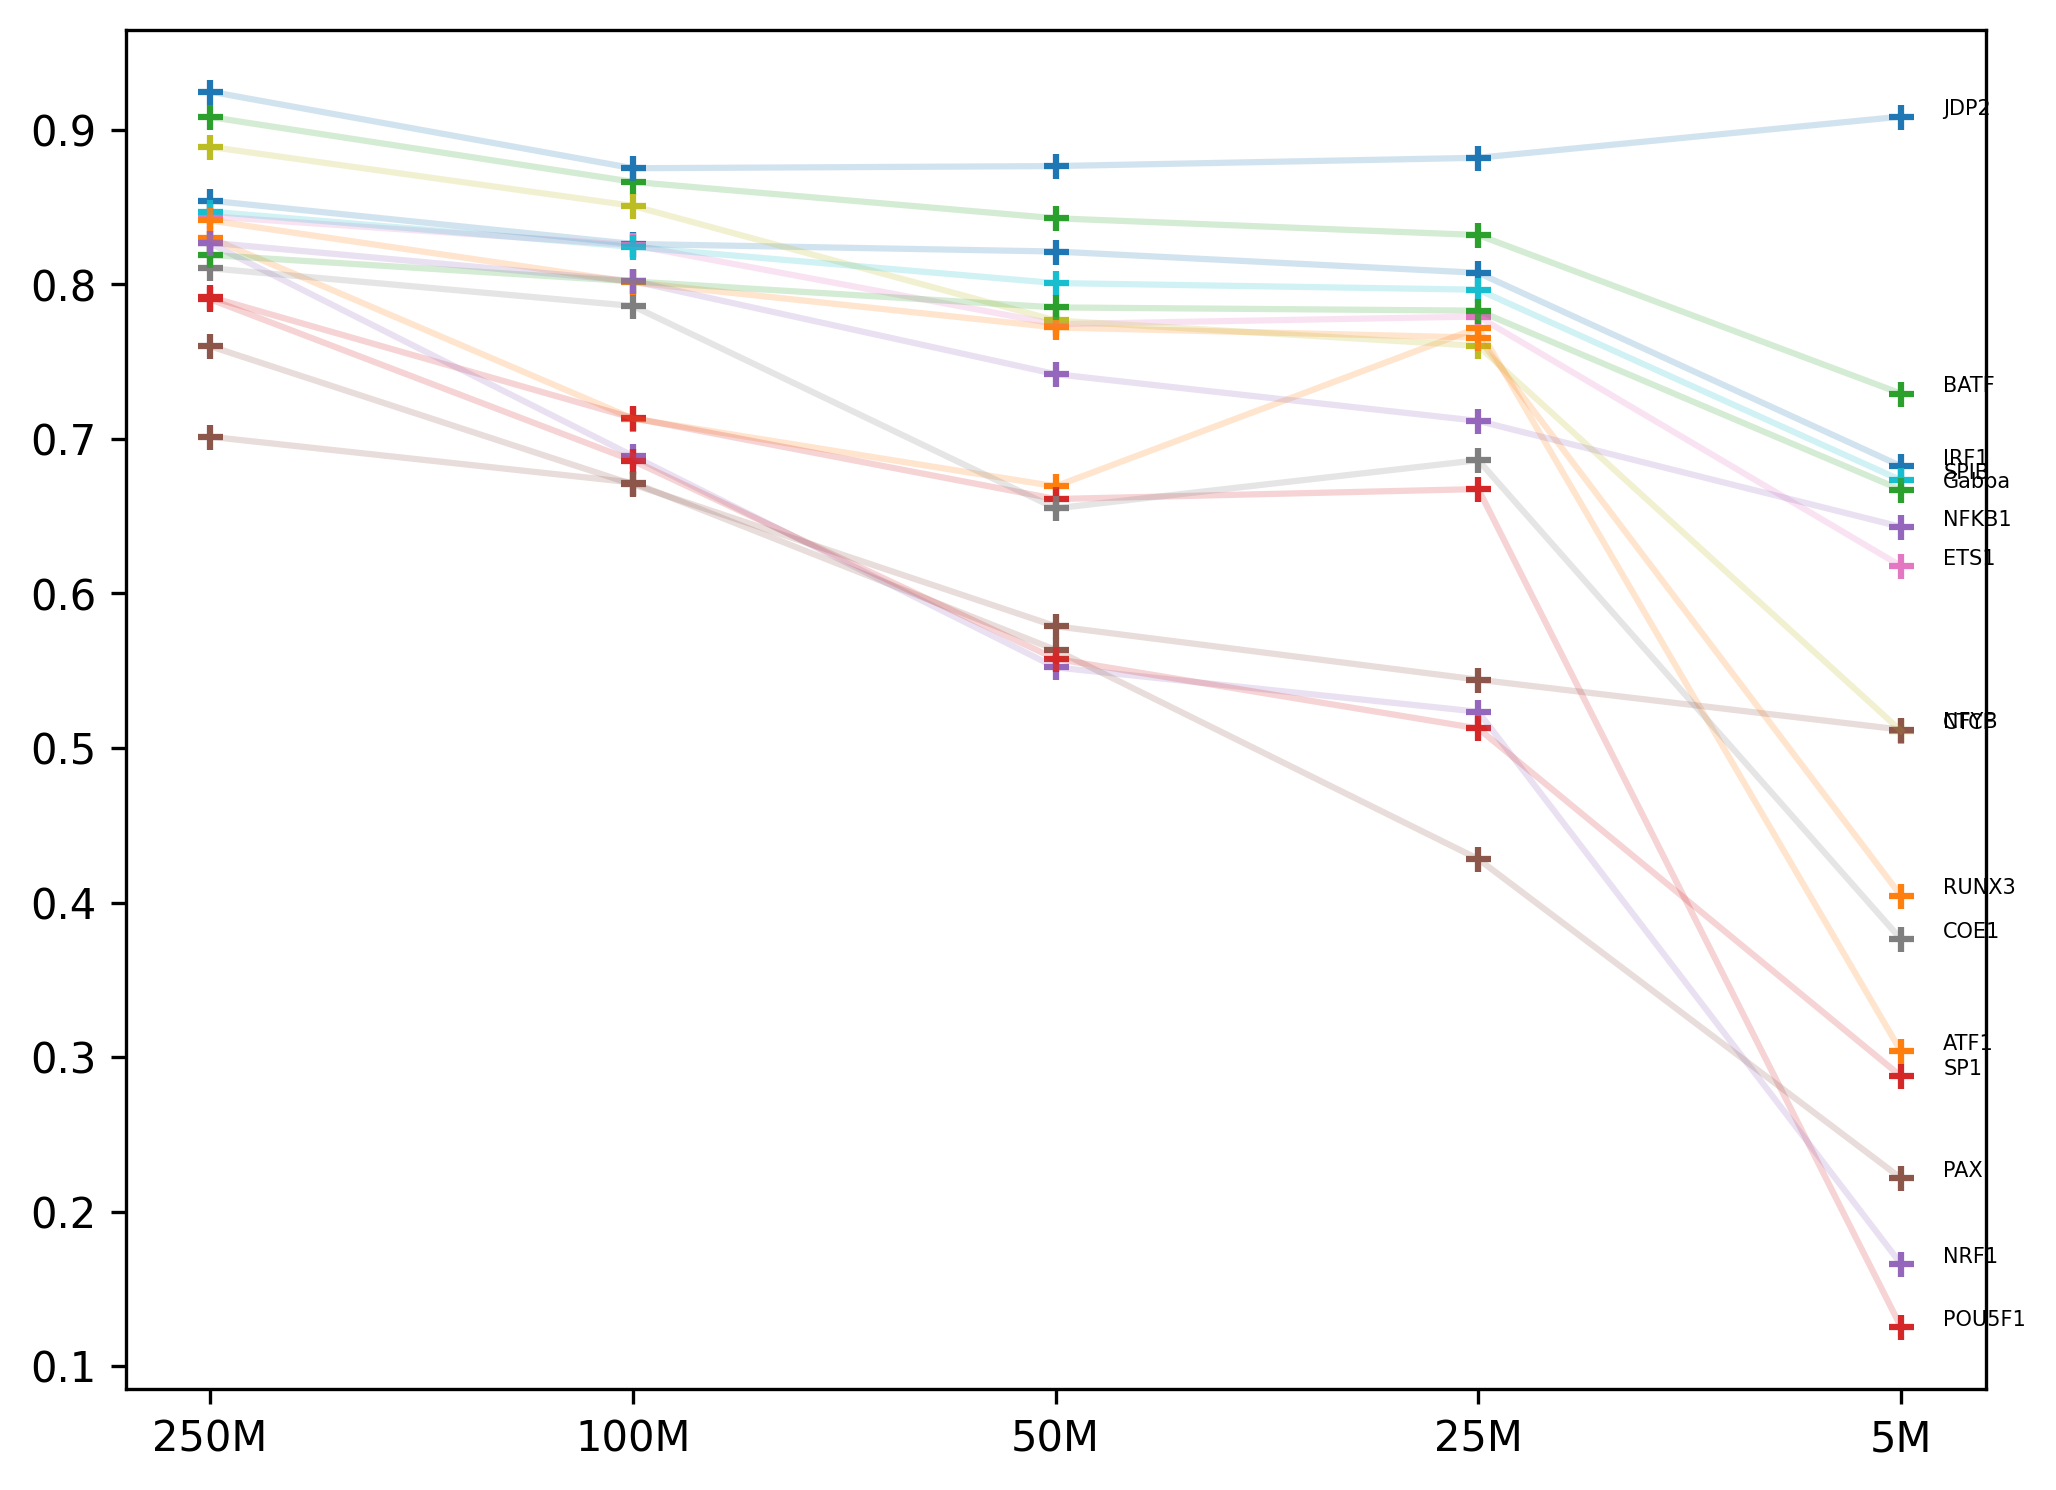

In [83]:

plt.figure(figsize=(8, 6), dpi=300)

for motif in new_order1:
    plt.scatter([1 ,2, 3, 4, 5], recall_per_motif[motif], label=motif, marker="+")
    plt.plot([1 ,2, 3, 4, 5], recall_per_motif[motif],alpha=0.2)
    #print(yaxis_lims)
    plt.text(5.1, recall_per_motif[motif][-1]+0.001, motif.split("_")[-2], fontsize=5)
    
plt.xticks([1 ,2, 3, 4, 5], labels=["250M", "100M" , "50M", "25M", "5M"])

plt.savefig("subfigs/hitcalling_compare/"+"hitcalling_report_recall.pdf", dpi=300, transparent=True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [84]:
recall_per_motif[motif]

[0.7600598603259062,
 0.6706019288327236,
 0.5788160957765215,
 0.5442301296973728,
 0.5118889258397074]

In [85]:
lists1 = []
for motif in new_order1:
    temp = [motif.split("_")[-2],250,recall_per_motif[motif][0],total_per_motif[motif][0]]
    lists1.append(temp)
    temp = [motif.split("_")[-2],100,recall_per_motif[motif][1],total_per_motif[motif][1]]
    lists1.append(temp)
    temp = [motif.split("_")[-2],50,recall_per_motif[motif][2],total_per_motif[motif][2]]
    lists1.append(temp)
    temp = [motif.split("_")[-2],25,recall_per_motif[motif][3],total_per_motif[motif][3]]
    lists1.append(temp)
    temp = [motif.split("_")[-2],5,recall_per_motif[motif][4],total_per_motif[motif][4]]
    lists1.append(temp)

In [86]:
df=pd.DataFrame(lists1,columns = ['Motif', 'Timepoint', "Recall", "Total"])

In [87]:
df.to_csv("subfigs/hitcalling_compare/subsample_data.csv",index=False,header=True)

In [88]:
df

,Motif,Timepoint,Recall,Total
0,IRF1,250,0.854248,178125
1,IRF1,100,0.826223,178125
2,IRF1,50,0.821311,178125
3,IRF1,25,0.807540,178125
4,IRF1,5,0.682436,178125
...,...,...,...,...
75,NFYB,250,0.760060,12028
76,NFYB,100,0.670602,12028
77,NFYB,50,0.578816,12028
78,NFYB,25,0.544230,12028


In [89]:
total_hits = []
dfs = [full_hits, hits_250M, hits_100M, hits_50M, hits_25M, hits_5M] 
for df in dfs:
    total_hits.append(df.shape[0])

(0.0, 1401787.0)

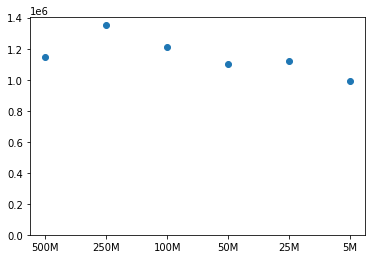

In [90]:
read_depth = ["500M", "250M", "100M", "50M", "25M", "5M"]
plt.scatter(read_depth,totals)
plt.ylim((0,max(totals)+0.5e5))

In [52]:
totals[-1]

0